# **Time Domain Feature And Hand Movement**

## 0. Start

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

## 1.Load and Process data (EEG and Hand Movement)

In [3]:
df_time=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/time_domain_features")

In [4]:
# drop participant 20, 21 , 27 since they have too many missing values
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered

,Unnamed: 0,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,...,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Test
0,0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,...,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,EEG_Test0_1
1,1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,...,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,EEG_Test0_2
2,2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,...,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,EEG_Test0_3
3,3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,...,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,EEG_Test0_4
4,4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,...,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,...,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,EEG_Test26_4
212,212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,...,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,EEG_Test26_5
213,213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,...,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,EEG_Test26_6
214,214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,...,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,EEG_Test26_7


In [5]:
df_time_filtered=df_time_filtered.drop(columns=["Unnamed: 0","Test"], )
df_time_filtered = df_time_filtered.reset_index(drop=True)
df_time_filtered

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_min,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,3336.410156,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,3422.563965,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,3976.923096,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,2852.307617,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,3692.820312,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,3763.076904,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,4018.974365,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3799.487061,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,3829.743408,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306


In [6]:
metadata=pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0
5,test5,27,Male,Right,08/22/2019/3:15:00 PM,5,15,09/13/2019/4:25:00 PM,1.0,19.0
6,test6,25,Male,Right,08/23/2019/1:55:00 PM,9,12,09/04/2019/4:50:00 PM,12.0,9.0
7,test7,27,Female,Right,08/23/2019/2:50:00 PM,1,14,09/04/2019/5:30:00 PM,10.0,8.0
8,test8,24,Female,Right,08/25/2019/12:50:00 PM,7,12,09.25/2019/4:45:00 PM,1.0,10.0
9,test9,20,Male,Right,08/28/2019/2:00:00 PM,9,11,09/04/2019/6:50:00 PM,11.0,16.0


In [7]:
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0
5,test5,5,15,1.0,19.0
6,test6,9,12,12.0,9.0
7,test7,1,14,10.0,8.0
8,test8,7,12,1.0,10.0
9,test9,9,11,11.0,16.0


In [8]:
df_rhm_acc = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/Emotiv_Right_acc_extracted.csv")
df_rhm_gyro= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/Emotiv_Right_gyro_extracted.csv")

def add_suffix_to_feature_names(df, suffix): # add '_gyro' and '_acc' to the feature names
    new_column_names = {col: col + suffix for col in df.columns}
    return df.rename(columns=new_column_names)

df_rhm_acc = add_suffix_to_feature_names(df_rhm_acc, '_acc')
df_rhm_gyro = add_suffix_to_feature_names(df_rhm_gyro, '_gyro')
df_rhm_acc=df_rhm_acc.drop(columns=["Filename_Part_acc"])
df_rhm_gyro=df_rhm_gyro.drop(columns=["Filename_Part_gyro"])
df_rhm = pd.concat([df_rhm_acc, df_rhm_gyro], axis = 1)
df_rhm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [9]:
# Concatenate Hand Movement and EEG
df_time_hm = pd.concat([df_time_filtered, df_rhm], axis = 1)
df_time_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [10]:
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_hm["Emotion"]=metadata_video_id_list
df_time_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1


## 2. Train Test Split

In [11]:
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_hm["Folder"]=folder
df_time_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [12]:
import random
folder_names = [i for i in range(1, 26)]
random.shuffle(folder_names)

# 80/20 split
train_split = int(0.8 * len(folder_names))  # 80% for training

train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[25, 5, 10, 12, 1, 8, 20, 17, 9, 4, 18, 11, 14, 22, 7, 23, 6, 21, 16, 13]
[3, 19, 2, 15, 24]


In [13]:
train_time = df_time_hm[df_time_hm['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_hm[df_time_hm['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]

In [14]:
train_time

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [15]:
test_time

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
8,4237.459595,23.514230,552.918990,4235.897461,4109.230469,4611.794922,552.918990,0.275458,4.340065,1.819586,...,6.557497e-06,0.012728,0.000162,6.261767e-06,0.005210,0.000027,3.746624,0.075454,1,2
9,4238.110528,25.949553,673.379301,4237.436035,4089.743408,4737.435547,673.379301,0.254055,4.724475,1.858417,...,1.855587e-06,0.043324,0.001877,7.617673e-07,0.019235,0.000370,7.034959,0.243268,1,2
10,4234.104078,34.928274,1219.984336,4233.846191,3768.205078,4737.435547,1219.984336,0.264979,4.769346,1.643700,...,-8.824531e-07,0.024018,0.000577,-3.314580e-06,0.010630,0.000113,5.445430,0.128374,1,2
11,4237.884736,42.084391,1771.095999,4235.897461,3396.923096,5335.897461,1771.095999,0.271029,4.698689,1.606309,...,6.421038e-06,0.033338,0.001111,1.296556e-06,0.014588,0.000213,7.006206,0.214886,1,2
12,4232.142454,13.862836,192.178219,4231.794922,4150.256348,4312.820312,192.178219,0.386095,3.221482,1.633915,...,2.593184e-07,0.009909,0.000098,1.440658e-07,0.003796,0.000014,4.280316,0.091428,0,2
13,4236.399436,16.640129,276.893882,4235.384277,4160.000000,4354.871582,276.893882,0.332916,3.694325,1.794830,...,-1.581575e-06,0.035071,0.001230,-5.202557e-08,0.016329,0.000267,7.242447,0.252382,0,2
14,4238.336263,21.993438,483.711295,4237.948730,3990.256348,4547.692383,483.711295,0.338336,3.708075,1.767503,...,-4.721873e-07,0.007397,0.000055,2.715077e-07,0.003043,0.000009,4.461366,0.063240,1,2
15,4239.239969,18.415145,339.117552,4238.461426,4125.641113,4456.410156,339.117552,0.326416,3.748679,1.827282,...,3.669006e-07,0.041549,0.001726,1.019169e-08,0.019414,0.000377,7.391577,0.253198,1,2
16,4237.360973,11.958514,143.006069,4234.871582,4180.000000,4414.358887,143.006069,0.447188,2.884642,1.693652,...,1.144248e-06,0.003092,0.000010,-3.273322e-14,0.001415,0.000002,2.810777,0.018408,0,3
17,4238.163760,14.548876,211.669783,4236.410156,4164.102539,4515.897461,211.669783,0.387541,3.355587,1.675562,...,-1.621042e-06,0.017638,0.000311,-4.146852e-07,0.008967,0.000080,6.667625,0.194485,0,3


## 3. Naive Bayes + 10 fold Cross Validation

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
def create_grid_search_naive_bayes_model():
    nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
    param_grid = {'gaussiannb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
    grid_search = GridSearchCV(nb_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
    return grid_search

In [17]:
fold = 10
cv_scores = []
best_model_time = None
best_accuracy_time = 0

for i in range(fold):
    random.shuffle(train_folders)

    # 90/10 split
    train_split_cv = int(0.9 * len(train_folders))  # 90% for training

    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]

    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_naive_bayes_model()

    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = best_model

print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 1e-09}
Fold 1 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 1e-09}
Fold 2 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 1e-09}
Fold 3 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 1e-09}
Fold 4 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 1e-09}
Fold 5 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 6: {'gaussiannb__var_smoothing': 1e-09}
Fold 6 completed. Va

In [18]:
print(train_folders_cv)
print(val_folders_cv)

[22, 14, 21, 20, 4, 18, 10, 23, 5, 8, 25, 17, 6, 12, 16, 11, 13, 9]
[1, 7]


In [19]:
print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Best validation accuracy: 75.00%


# **Frequency Domain Feature And Hand Movement**

## 1. Load Data

In [20]:
df_frequency=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MLMA Project/BS-HMS-Dataset/frequency_domain_features")

In [21]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_frequency_filtered = df_frequency[~df_frequency['Test'].str.contains('|'.join(rows_to_drop))]
df_frequency_filtered = df_frequency_filtered.reset_index(drop=True)
df_frequency_filtered=df_frequency_filtered.drop(columns=["Unnamed: 0","Test"])
df_frequency_filtered

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Alpha_power,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,2243.869658,1827.793507,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,35.976256,50.502736,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,254.636918,246.406774,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,165.243148,173.137554,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,19.115841,36.050785,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,133.114646,101.401419,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,21.999580,23.522324,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,25.061109,33.520476,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,16.653489,22.146428,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117


In [22]:
df_frequency_hm = pd.concat([df_frequency_filtered, df_rhm], axis = 1)
df_frequency_hm

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [23]:
df_frequency_hm["Emotion"]=metadata_video_id_list
df_frequency_hm

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1


## 2. Train Test Split

In [24]:
df_frequency_hm["Folder"]=folder
df_frequency_hm

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [25]:
train_frequency = df_frequency_hm[df_frequency_hm['Folder'].isin(train_folders)]
X_train_frequency =train_frequency.iloc[:,:-2]
y_train_frequency=train_frequency.iloc[:,-2]

test_frequency = df_frequency_hm[df_frequency_hm['Folder'].isin(test_folders)]
X_test_frequency =test_frequency.iloc[:,:-2]
y_test_frequency=test_frequency.iloc[:,-2]
train_frequency

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


## 3. Naive Bayes + 10 fold Cross Validation

In [26]:
cv_scores_frequency = []
best_model_frequency = None
best_accuracy_frequency = 0
train_folders_name = train_folders.copy()

for i in range(fold):
    random.shuffle(train_folders_name)

    # 90/10 split
    train_split_cv = int(0.9 * len(train_folders_name))  # 90% for training

    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_frequency[train_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_frequency[train_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_naive_bayes_model()
    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_frequency.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_frequency:
        best_accuracy_frequency = val_accuracy
        best_model_frequency = best_model

print(f"Best validation accuracy: {best_accuracy_frequency * 100:.2f}%")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 1e-09}
Fold 1 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 1e-09}
Fold 2 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 1e-06}
Fold 3 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 1e-09}
Fold 4 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 1e-09}
Fold 5 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 6: {'gaussiannb__var_smoothing': 1e-05}
Fold 6 completed. Va

# **Combined Features And Hand Movement**

## 1. Concatenate Data

In [27]:
# df_time_filtered_incomplete=df_time_filtered.iloc[:,:-2]
df_time_frequency=pd.concat([df_time_filtered, df_frequency_filtered], axis=1)
df_time_frequency_hm = pd.concat([df_time_frequency, df_rhm], axis = 1)
df_time_frequency_hm["Emotion"]=metadata_video_id_list
df_time_frequency_hm["Folder"]=folder
df_time_frequency_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


## 2. Train Test Split

In [28]:
train_time_frequency = df_time_frequency_hm[df_time_frequency_hm['Folder'].isin(train_folders)]
X_train_time_frequency =train_time_frequency.iloc[:,:-2]
y_train_time_frequency=train_time_frequency.iloc[:,-2]

test_time_frequency = df_time_frequency_hm[df_time_frequency_hm['Folder'].isin(test_folders)]
X_test_time_frequency =test_time_frequency.iloc[:,:-2]
y_test_time_frequency=test_time_frequency.iloc[:,-2]
X_test_time_frequency

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
8,4237.459595,23.514230,552.918990,4235.897461,4109.230469,4611.794922,552.918990,0.275458,4.340065,1.819586,...,-0.085125,0.019794,6.557497e-06,0.012728,0.000162,6.261767e-06,0.005210,0.000027,3.746624,0.075454
9,4238.110528,25.949553,673.379301,4237.436035,4089.743408,4737.435547,673.379301,0.254055,4.724475,1.858417,...,-0.003989,0.009523,1.855587e-06,0.043324,0.001877,7.617673e-07,0.019235,0.000370,7.034959,0.243268
10,4234.104078,34.928274,1219.984336,4233.846191,3768.205078,4737.435547,1219.984336,0.264979,4.769346,1.643700,...,-0.031533,0.013239,-8.824531e-07,0.024018,0.000577,-3.314580e-06,0.010630,0.000113,5.445430,0.128374
11,4237.884736,42.084391,1771.095999,4235.897461,3396.923096,5335.897461,1771.095999,0.271029,4.698689,1.606309,...,-0.012683,0.011897,6.421038e-06,0.033338,0.001111,1.296556e-06,0.014588,0.000213,7.006206,0.214886
12,4232.142454,13.862836,192.178219,4231.794922,4150.256348,4312.820312,192.178219,0.386095,3.221482,1.633915,...,0.017643,-0.001228,2.593184e-07,0.009909,0.000098,1.440658e-07,0.003796,0.000014,4.280316,0.091428
13,4236.399436,16.640129,276.893882,4235.384277,4160.000000,4354.871582,276.893882,0.332916,3.694325,1.794830,...,-0.136341,-0.010772,-1.581575e-06,0.035071,0.001230,-5.202557e-08,0.016329,0.000267,7.242447,0.252382
14,4238.336263,21.993438,483.711295,4237.948730,3990.256348,4547.692383,483.711295,0.338336,3.708075,1.767503,...,0.053919,-0.023049,-4.721873e-07,0.007397,0.000055,2.715077e-07,0.003043,0.000009,4.461366,0.063240
15,4239.239969,18.415145,339.117552,4238.461426,4125.641113,4456.410156,339.117552,0.326416,3.748679,1.827282,...,-0.002684,0.020964,3.669006e-07,0.041549,0.001726,1.019169e-08,0.019414,0.000377,7.391577,0.253198
16,4237.360973,11.958514,143.006069,4234.871582,4180.000000,4414.358887,143.006069,0.447188,2.884642,1.693652,...,-0.259291,0.066079,1.144248e-06,0.003092,0.000010,-3.273322e-14,0.001415,0.000002,2.810777,0.018408
17,4238.163760,14.548876,211.669783,4236.410156,4164.102539,4515.897461,211.669783,0.387541,3.355587,1.675562,...,-0.022998,0.010907,-1.621042e-06,0.017638,0.000311,-4.146852e-07,0.008967,0.000080,6.667625,0.194485


## 3. Naive Bayes + 10 fold Cross Validation

In [29]:
cv_scores_time_frequency = []
best_model_time_frequency = 0
best_accuracy_time_frequency = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    random.shuffle(train_folders_name)

    # 90/10 split
    train_split_cv = int(0.9 * len(train_folders_name))  # 90% for training

    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_time_frequency[train_time_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time_frequency[train_time_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_naive_bayes_model()

    grid_search_model.fit(X_train_cv, y_train_cv)
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_time_frequency.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time_frequency:
        best_accuracy_time_frequency = val_accuracy
        best_model_time_frequency = best_model

print(f"Best validation accuracy: {best_accuracy_time_frequency * 100:.2f}%")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 1e-09}
Fold 1 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 1e-09}
Fold 2 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 1e-09}
Fold 3 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 1e-06}
Fold 4 completed. Validation accuracy: 81.25%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 1e-09}
Fold 5 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 6: {'gaussiannb__var_smoothing': 1e-05}
Fold 6 completed. Va

In [30]:
print(train_folders_cv)
print(val_folders_cv)

[25, 16, 21, 22, 5, 8, 17, 6, 12, 9, 13, 1, 14, 23, 4, 7, 20, 18]
[11, 10]


# **Theoretically Important Position Features And Hand Movement**

## 1. Extract Data

In [31]:
df_time_frequency.columns
selected_columns = [col for col in df_time_frequency.columns if any(feature in col for feature in ['F3', 'F4', 'FC5', 'FC6', 'O1', 'O2', 'Emotion','Folder'])]

df_important_positions = df_time_frequency[selected_columns]
df_important_positions

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F4_Alpha_power,F4_Beta_power,F4_Gamma_power,F4_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,23.850603,37.457958,12.029786,3.181718,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,17.847675,31.088716,12.436428,3.171125,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,13.294399,30.542491,14.274776,3.909695,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,18.472259,31.810190,15.984435,2.310437,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,12.902672,29.583501,14.544876,3.747753,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,17.173787,35.580769,28.791751,4.099605,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,16.595156,15.901113,6.217567,2.119598,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,12.766454,14.333598,6.597051,1.864852,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,18.523437,17.516287,7.239505,3.359720,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117


In [32]:
df_important_positions_hm = pd.concat([df_important_positions, df_rhm], axis = 1)
df_important_positions_hm["Emotion"]=metadata_video_id_list
df_important_positions_hm["Folder"]=folder
df_important_positions_hm

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


## 2. Train Test Split

In [33]:
train_important_positions = df_important_positions_hm[df_important_positions_hm['Folder'].isin(train_folders)]
X_train_important_positions =train_important_positions.iloc[:,:-2]
y_train_important_positions=train_important_positions.iloc[:,-2]

test_important_positions = df_important_positions_hm[df_important_positions_hm['Folder'].isin(test_folders)]
X_test_important_positions =test_important_positions.iloc[:,:-2]
y_test_important_positions=test_important_positions.iloc[:,-2]

## 3. Naive Bayes + 10 fold Cross Validation

In [34]:
cv_scores_important_positions= []
best_model_important_positions = 0
best_accuracy_important_positions = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    random.shuffle(train_folders_name)

    # 90/10 split
    train_split_cv = int(0.9 * len(train_folders_name))  # 90% for training

    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_important_positions[train_important_positions['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_important_positions[train_important_positions['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    grid_search_model = create_grid_search_naive_bayes_model()

    grid_search_model.fit(X_train_cv, y_train_cv)
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_important_positions.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_important_positions:
        best_accuracy_important_positions = val_accuracy
        best_model_important_positions = best_model

print(f"Best validation accuracy: {best_accuracy_important_positions * 100:.2f}%")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 1: {'gaussiannb__var_smoothing': 1e-09}
Fold 1 completed. Validation accuracy: 87.50%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 2: {'gaussiannb__var_smoothing': 1e-09}
Fold 2 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 3: {'gaussiannb__var_smoothing': 1e-09}
Fold 3 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 4: {'gaussiannb__var_smoothing': 1e-09}
Fold 4 completed. Validation accuracy: 68.75%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 5: {'gaussiannb__var_smoothing': 1e-09}
Fold 5 completed. Validation accuracy: 31.25%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for fold 6: {'gaussiannb__var_smoothing': 1e-09}
Fold 6 completed. Va

In [35]:
print(train_folders_cv)
print(val_folders_cv)

[20, 18, 7, 4, 8, 21, 16, 5, 10, 1, 17, 14, 23, 6, 25, 22, 13, 9]
[12, 11]


In [36]:
print(cv_scores_important_positions)

[0.875, 0.4375, 0.75, 0.6875, 0.3125, 0.75, 0.4375, 0.6875, 0.5625, 0.6875]



# **Evaluation**

# Time and Hand Test Accuracy

Test Accuracy: 50.00%


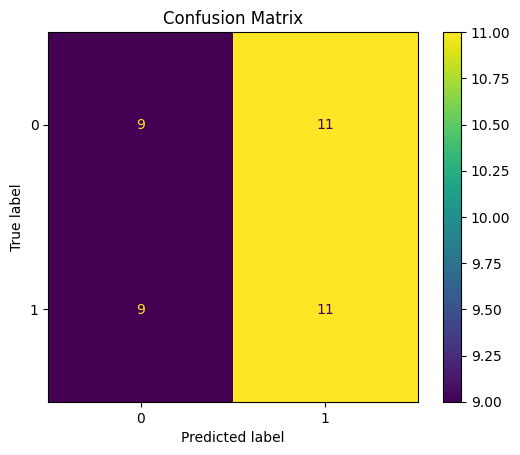

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47        20
           1       0.50      0.55      0.52        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")

test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)

# Frequency And Hand Test Accuracy

Test Accuracy: 50.00%


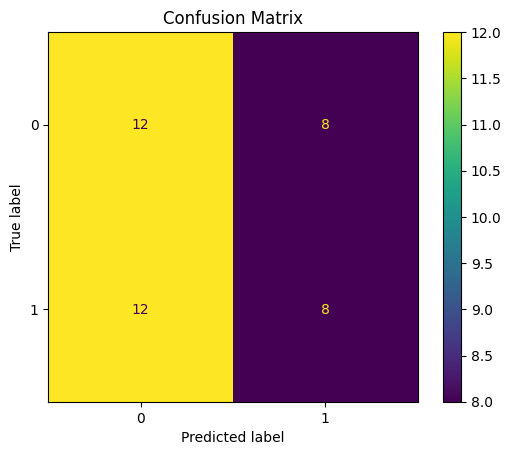

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        20
           1       0.50      0.40      0.44        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.50      0.50      0.49        40



In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_frequency = (best_model_frequency.predict(X_test_frequency) > 0.5).astype("int32")

test_accuracy_frequency = accuracy_score(y_test_frequency, y_pred_frequency)
print(f"Test Accuracy: {test_accuracy_frequency * 100:.2f}%")

conf_matrix_frequency = confusion_matrix(y_test_frequency, y_pred_frequency)

ConfusionMatrixDisplay(conf_matrix_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_frequency = classification_report(y_test_frequency, y_pred_frequency)
print("Classification Report:")
print(report_frequency)

# Combined And Hand Test Accuracy


Test Accuracy: 47.50%


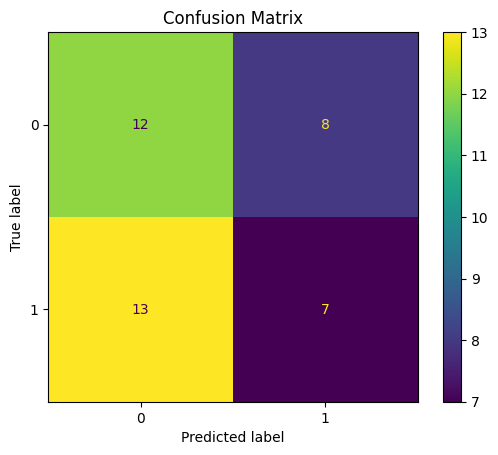

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.60      0.53        20
           1       0.47      0.35      0.40        20

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_time_frequency = (best_model_time_frequency.predict(X_test_time_frequency) > 0.5).astype("int32")

test_accuracy_time_frequency = accuracy_score(y_test_time_frequency, y_pred_time_frequency)
print(f"Test Accuracy: {test_accuracy_time_frequency * 100:.2f}%")

conf_matrix_time_frequency = confusion_matrix(y_test_time_frequency, y_pred_time_frequency)

ConfusionMatrixDisplay(conf_matrix_time_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_time_frequency = classification_report(y_test_time_frequency, y_pred_time_frequency)
print("Classification Report:")
print(report_time_frequency)

# Important Position And Hand Test Accuracy

Test Accuracy: 50.00%


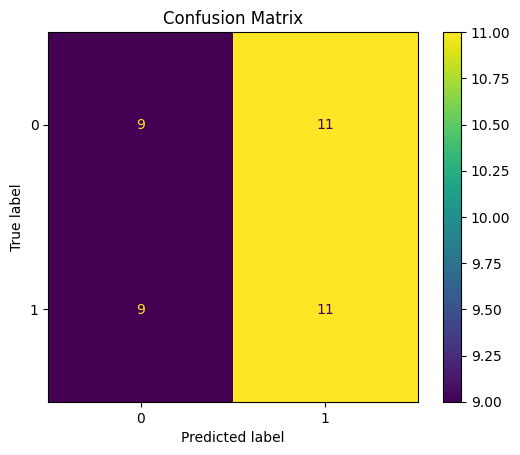

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47        20
           1       0.50      0.55      0.52        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



In [40]:
y_pred_important_positions = (best_model_important_positions.predict(X_test_important_positions) > 0.5).astype("int32")

test_accuracy_important_positions = accuracy_score(y_test_important_positions, y_pred_important_positions)
print(f"Test Accuracy: {test_accuracy_important_positions * 100:.2f}%")

conf_matrix_important_positions = confusion_matrix(y_test_important_positions, y_pred_important_positions)

ConfusionMatrixDisplay(conf_matrix_important_positions).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

report_important_positions = classification_report(y_test_important_positions, y_pred_important_positions)
print("Classification Report:")
print(report_important_positions)

# ROC curves

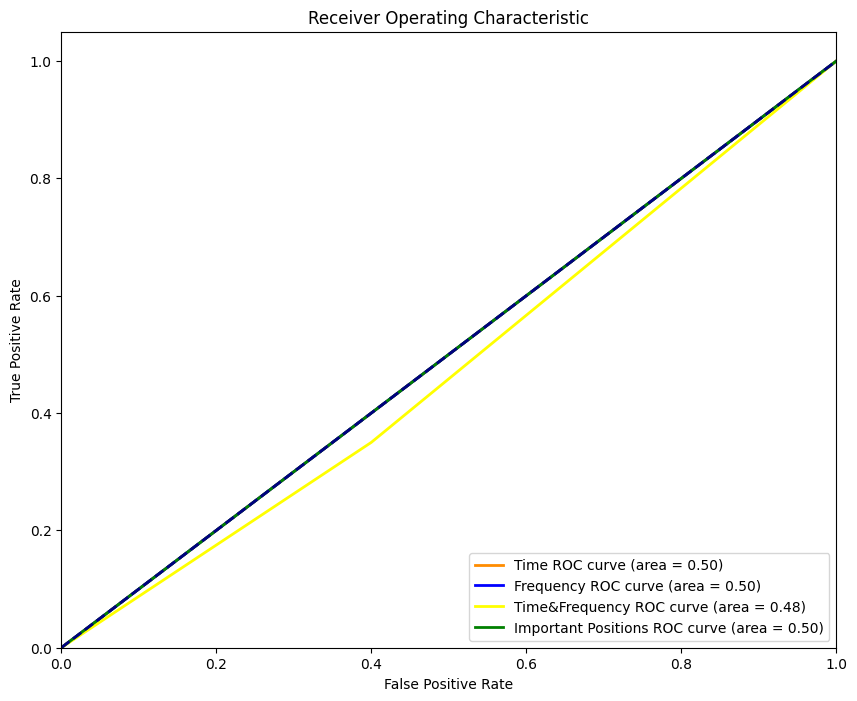

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs_time = best_model_time.predict(X_test_time).ravel()
y_pred_probs_frequency = best_model_frequency.predict(X_test_frequency).ravel()
y_pred_probs_time_frequency = best_model_time_frequency.predict(X_test_time_frequency).ravel()
y_pred_probs_important_positions = best_model_important_positions.predict(X_test_important_positions).ravel()  # New model

fpr_time, tpr_time, thresholds_time = roc_curve(y_test_time, y_pred_probs_time)
roc_auc_time = auc(fpr_time, tpr_time)

fpr_frequency, tpr_frequency, thresholds_frequency = roc_curve(y_test_frequency, y_pred_probs_frequency)
roc_auc_frequency = auc(fpr_frequency, tpr_frequency)

fpr_time_frequency, tpr_time_frequency, thresholds_time_frequency = roc_curve(y_test_time_frequency, y_pred_probs_time_frequency)
roc_auc_time_frequency = auc(fpr_time_frequency, tpr_time_frequency)

fpr_important_positions, tpr_important_positions, thresholds_important_positions = roc_curve(y_test_important_positions, y_pred_probs_important_positions)  # New ROC computation
roc_auc_important_positions = auc(fpr_important_positions, tpr_important_positions)  # New AUC computation

plt.figure(figsize=(10, 8))
plt.plot(fpr_time, tpr_time, color='darkorange', lw=2, label='Time ROC curve (area = %0.2f)' % roc_auc_time)
plt.plot(fpr_frequency, tpr_frequency, color='blue', lw=2, label='Frequency ROC curve (area = %0.2f)' % roc_auc_frequency)
plt.plot(fpr_time_frequency, tpr_time_frequency, color='yellow', lw=2, label='Time&Frequency ROC curve (area = %0.2f)' % roc_auc_time_frequency)
plt.plot(fpr_important_positions, tpr_important_positions, color='green', lw=2, label='Important Positions ROC curve (area = %0.2f)' % roc_auc_important_positions)  # New curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()